<a href="https://colab.research.google.com/github/mandalravi/Machine-Learning/blob/master/Classification%20problem/Loan%20Prediction/Code/Loan%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Problem - Loan Prediction




## 1. Introduction

### Problem Statement
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Data

|Variable|Description|
|--------:|----------:|
|Loan_ID|Unique Loan ID|
|Gender|Male/ Female|
|Married|Applicant married (Y/N)|
|Dependents|Number of dependents|
|Education|Applicant Education (Graduate/ Under Graduate)|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Applicant income|
|CoapplicantIncome|Coapplicant income|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines|
|Property_Area|Urban/ Semi Urban/ Rural|
|Loan_Status|Loan approved (Y/N)|

**Note:**

> Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.

## 2. Getting started

In [0]:
#Loading the packages

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [0]:
# Setting the path
# path = "E:/ML/Classification problem/Loan Prediction"
# os.chdir(path)

In [0]:
# reading data
url1 = 'https://raw.githubusercontent.com/mandalravi/Machine-Learning/master/Classification%20problem/Loan%20Prediction/Input/train.csv'
url2 = 'https://raw.githubusercontent.com/mandalravi/Machine-Learning/master/Classification%20problem/Loan%20Prediction/Input/test.csv'

train = pd.read_csv(url1)
test = pd.read_csv(url2)

## 3. Glimpse of data

In [4]:
train.shape

(614, 13)

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
numeric_features = train.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = train.iloc[:, 0:12].select_dtypes(include = ['object']).columns

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

Numeric features: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Categorical features: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


In [8]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 4. Exploratory data analysis

### 4.1 Target Variable

In [10]:
train.Loan_Status.value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

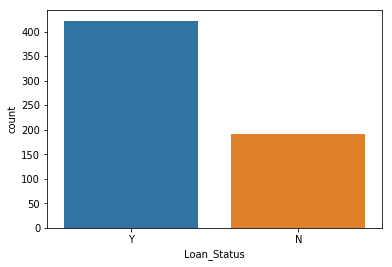

In [11]:
sns.countplot(train['Loan_Status'],label="Count")
plt.show()

### 4.2 Independant Features

#### 4.2.1 Univariate analysis

##### 4.2.1.1 Descriptive Statistics

In [12]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


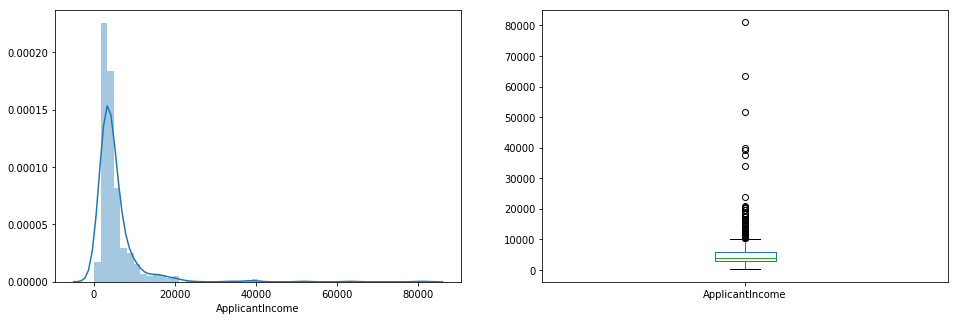

In [13]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show();

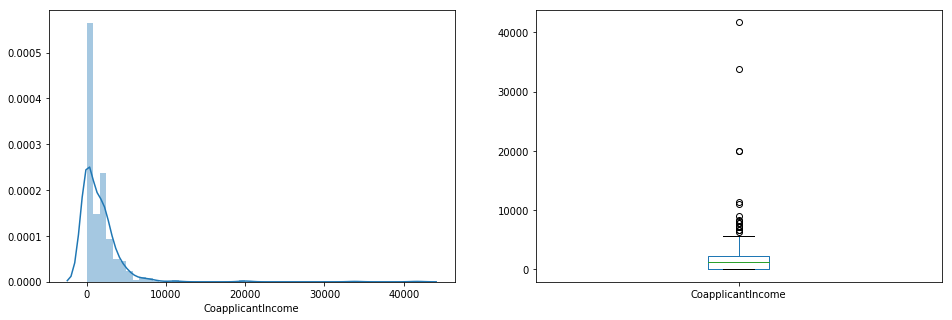

In [14]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show();

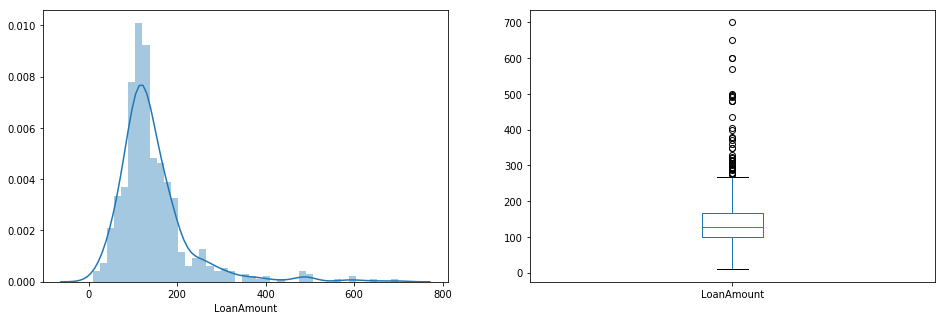

In [15]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna());

plt.subplot(122)
train['LoanAmount'].dropna().plot.box(figsize=(16,5))

plt.show();

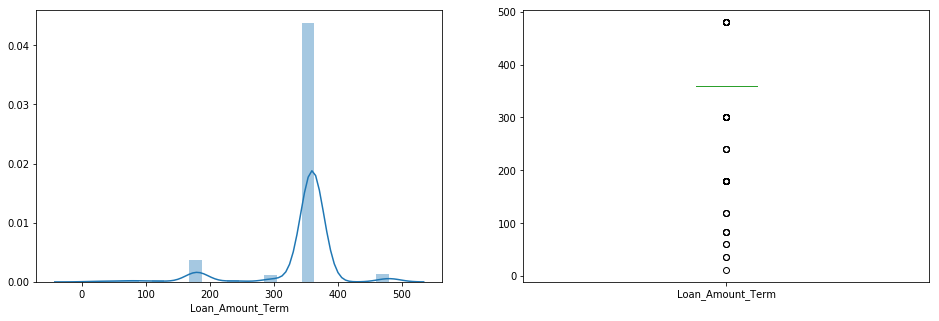

In [16]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Loan_Amount_Term'].dropna());

plt.subplot(122)
train['Loan_Amount_Term'].dropna().plot.box(figsize=(16,5))

plt.show();

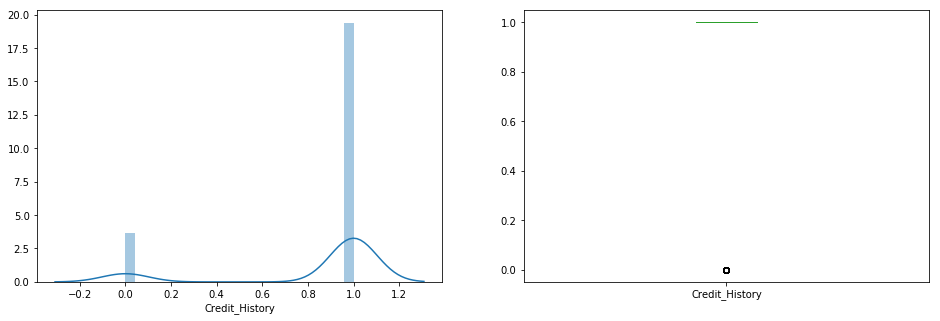

In [17]:
#Numerical Variable
plt.figure(1)
plt.subplot(121)
sns.distplot(train['Credit_History'].dropna());

plt.subplot(122)
train['Credit_History'].dropna().plot.box(figsize=(16,5))

plt.show();

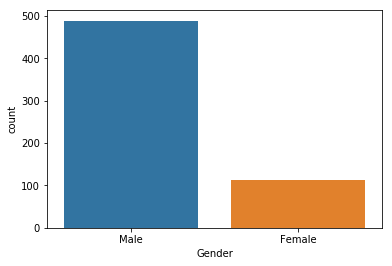

In [18]:
sns.countplot(train['Gender'],label="Count")
plt.show()

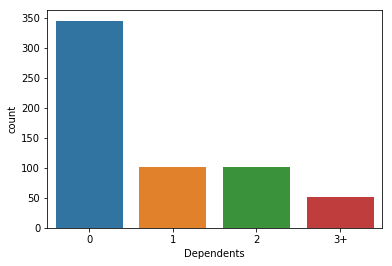

In [19]:
sns.countplot(train['Dependents'],label="Count")
plt.show()

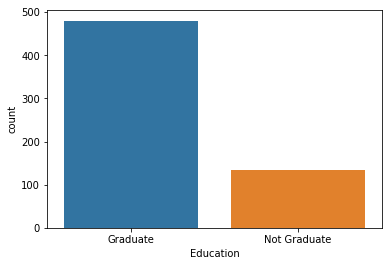

In [20]:
sns.countplot(train['Education'],label="Count")
plt.show()

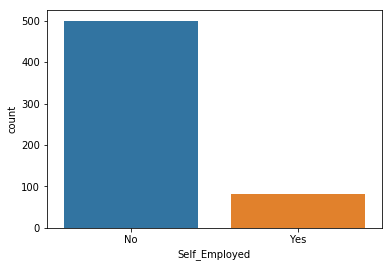

In [21]:
sns.countplot(train['Self_Employed'],label="Count")
plt.show()

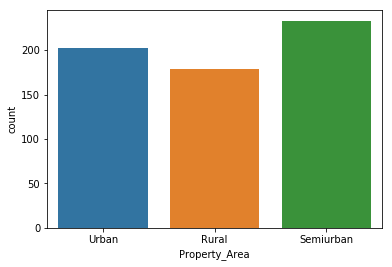

In [22]:
sns.countplot(train['Property_Area'],label="Count")
plt.show()

#### 4.2.2 Bivariate analysis

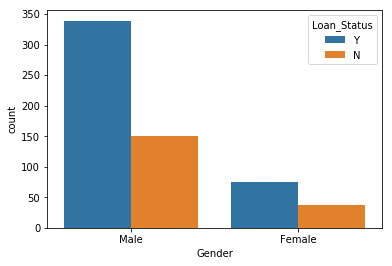

In [23]:
sns.countplot(train['Gender'], hue=train['Loan_Status'])
plt.show()

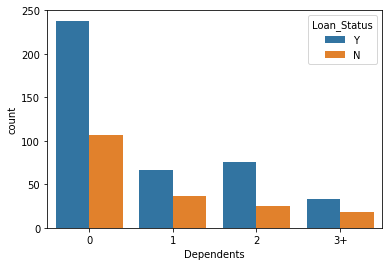

In [24]:
sns.countplot(train['Dependents'], hue=train['Loan_Status'])
plt.show()

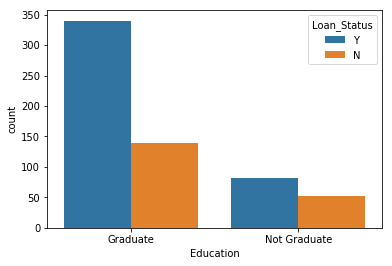

In [25]:
sns.countplot(train['Education'], hue=train['Loan_Status'])
plt.show()

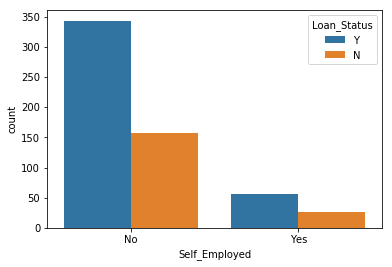

In [26]:
sns.countplot(train['Self_Employed'], hue=train['Loan_Status'])
plt.show()

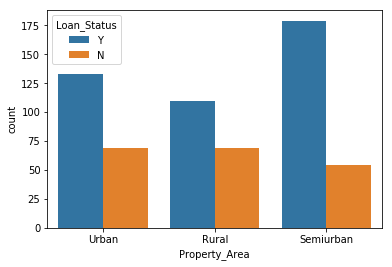

In [27]:
sns.countplot(train['Property_Area'], hue=train['Loan_Status'])
plt.show()

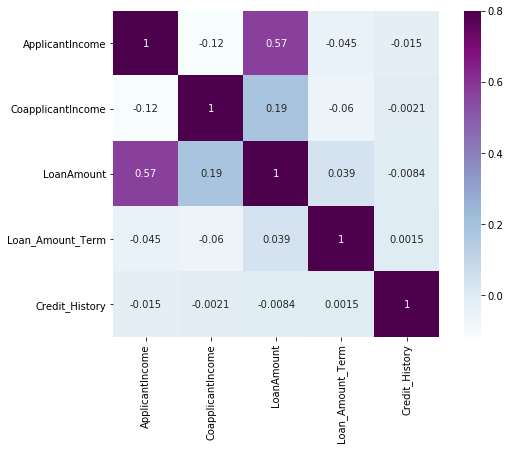

In [28]:
corr_matrix = train[numeric_features].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr_matrix, vmax=.8, annot=True, square=True, cmap="BuPu");